In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('imdb.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,81.0,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",100.0,134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",84.0,534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",94.0,377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",94.0,96.90,9.0


In [5]:
df.shape

(1000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            1000 non-null   object 
 1   Movie_name      1000 non-null   object 
 2   Year            1000 non-null   object 
 3   Certificate     993 non-null    object 
 4   Runtime_in_min  1000 non-null   int64  
 5   Genre           1000 non-null   object 
 6   Metascore       840 non-null    float64
 7   Gross_in_$_M    841 non-null    object 
 8   Rating_from_10  1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [7]:
df['Certificate'].unique()

array(['R', 'PG-13', 'Approved', 'UA', 'TV-MA', 'PG', 'U', 'Not Rated',
       'G', '13', 'TV-14', 'Passed', nan, 'M/PG', 'A', 'GP', '18',
       'TV-PG', 'Unrated', 'NC-17'], dtype=object)

In [8]:
df.describe()

,Runtime_in_min,Metascore,Rating_from_10
count,1000.000000,840.000000,1000.000000
mean,123.798000,78.795238,7.968100
std,28.540844,12.021474,0.277145
min,45.000000,28.000000,7.600000
25%,103.000000,71.000000,7.800000
50%,120.000000,80.000000,7.900000
75%,138.000000,88.000000,8.100000
max,321.000000,100.000000,9.300000


In [9]:
df.isnull().sum()

Rank                0
Movie_name          0
Year                0
Certificate         7
Runtime_in_min      0
Genre               0
Metascore         160
Gross_in_$_M      159
Rating_from_10      0
dtype: int64

## Completeness Issue
    Missing Values in Certificate, Metascore and Gross_in_$_M
    

In [10]:
df[df['Certificate'].isnull()]

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
100,101,Ayla: The Daughter of War,2017,NaN,125,"Biography, Drama, History",NaN,NaN,8.3
263,264,Everything's Gonna Be Great,1998,NaN,107,"Comedy, Drama, Thriller",NaN,NaN,8.1
339,340,"Quo Vadis, Aida?",2020,NaN,101,"Drama, History, War",97.0,NaN,8.0
363,364,The Breath,2009,NaN,128,"Action, Drama, Thriller",NaN,NaN,8.0
391,392,Vizontele,2001,NaN,110,"Comedy, Drama",NaN,NaN,8.0
760,761,Perfect Strangers,2016,NaN,96,"Comedy, Drama",NaN,NaN,7.7
848,849,Fireworks,1997,NaN,103,"Crime, Drama, Romance",NaN,0.23,7.7


In [11]:
df[df['Metascore'].isnull()]

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
7,8,777 Charlie,2022,UA,136,"Adventure, Comedy, Drama",NaN,NaN,8.9
9,10,Rocketry: The Nambi Effect,2022,UA,157,"Biography, Drama",NaN,NaN,8.8
10,11,Jai Bhim,2021,TV-MA,164,"Crime, Drama, Mystery",NaN,#233,8.8
17,18,Soorarai Pottru,2020,TV-MA,153,Drama,NaN,NaN,8.7
22,23,Sita Ramam,2022,U,163,"Action, Drama, Mystery",NaN,NaN,8.6
...,...,...,...,...,...,...,...,...,...
885,886,Zelig,1983,PG,79,Comedy,NaN,11.80,7.7
903,904,Belle de Jour,1967,R,100,"Drama, Romance",NaN,0.03,7.7
911,912,Breathless,1960,Not Rated,90,"Crime, Drama",NaN,0.34,7.7
916,917,Key Largo,1948,Not Rated,100,"Action, Crime, Drama",NaN,NaN,7.7


In [12]:
df[df['Gross_in_$_M'].isnull()]

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
7,8,777 Charlie,2022,UA,136,"Adventure, Comedy, Drama",NaN,NaN,8.9
9,10,Rocketry: The Nambi Effect,2022,UA,157,"Biography, Drama",NaN,NaN,8.8
17,18,Soorarai Pottru,2020,TV-MA,153,Drama,NaN,NaN,8.7
22,23,Sita Ramam,2022,U,163,"Action, Drama, Mystery",NaN,NaN,8.6
36,37,Kaithi,2019,Not Rated,145,"Action, Adventure, Crime",NaN,NaN,8.5
...,...,...,...,...,...,...,...,...,...
991,992,Repulsion,1965,Not Rated,105,"Drama, Horror, Thriller",91.0,NaN,7.6
994,995,Rebel Without a Cause,1955,PG-13,111,Drama,89.0,NaN,7.6
995,996,Sabrina,1954,Passed,113,"Comedy, Drama, Romance",72.0,NaN,7.6
998,999,The 39 Steps,1935,Approved,86,"Crime, Mystery, Thriller",93.0,NaN,7.6


In [13]:
df.sample(10)

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
580,581,Strangers on a Train,1951,PG,101,"Crime, Drama, Film-Noir",88.0,7.63,7.9
28,29,Life Is Beautiful,1997,PG-13,116,"Comedy, Drama, Romance",59.0,57.60,8.6
966,967,Traffic,2000,R,147,"Crime, Drama, Thriller",86.0,124.12,7.6
450,451,Anatomy of a Murder,1959,Not Rated,161,"Drama, Mystery",95.0,11.90,8.0
506,507,Dallas Buyers Club,2013,R,117,"Biography, Drama",77.0,27.30,7.9
262,263,Catch Me If You Can,2002,PG-13,141,"Biography, Crime, Drama",75.0,164.62,8.1
638,639,The Social Network,2010,PG-13,120,"Biography, Drama",95.0,96.96,7.8
377,378,Sin City,2005,R,124,"Crime, Thriller",74.0,74.10,8.0
214,215,A Silent Voice: The Movie,2016,Not Rated,130,"Animation, Drama",78.0,NaN,8.1
193,194,For a Few Dollars More,1965,R,132,Western,74.0,15.00,8.2


In [14]:
df.drop_duplicates()

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,81.0,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",100.0,134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",84.0,534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",94.0,377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",94.0,96.90,9.0
...,...,...,...,...,...,...,...,...,...
995,996,Sabrina,1954,Passed,113,"Comedy, Drama, Romance",72.0,NaN,7.6
996,997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",85.0,30.50,7.6
997,998,Snow White and the Seven Dwarfs,1937,Approved,83,"Animation, Adventure, Family",96.0,184.93,7.6
998,999,The 39 Steps,1935,Approved,86,"Crime, Mystery, Thriller",93.0,NaN,7.6


In [15]:
df

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,81.0,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",100.0,134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",84.0,534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",94.0,377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",94.0,96.90,9.0
...,...,...,...,...,...,...,...,...,...
995,996,Sabrina,1954,Passed,113,"Comedy, Drama, Romance",72.0,NaN,7.6
996,997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",85.0,30.50,7.6
997,998,Snow White and the Seven Dwarfs,1937,Approved,83,"Animation, Adventure, Family",96.0,184.93,7.6
998,999,The 39 Steps,1935,Approved,86,"Crime, Mystery, Thriller",93.0,NaN,7.6


<div class="alert alert-block alert-success">
<b></b> 
</div>

     Certain year starts with roman numbers
     for certificate sometime r pg-13 are used and sometime approved passed are used 
     incorrect datatypes for rank, year, certificate 
     inconsistent way of storing year column
     in the certificate column the unrated is same as not rated 

## completeness issue 
      dealing with missing values

In [16]:
most_common_certificate = df['Certificate'].mode()[0]
df['Certificate'] = df['Certificate'].fillna(most_common_certificate)


In [17]:
df['Certificate'].isnull().sum()

0

       The null values in the certificate column is now replaced by the most common certificate of the Ceritificate column. 

      Since the columns Metascore and Gross_in_$_M has 160 and 159 number of null values which represents nearly 15-16% of our dataset so it cannot be dropped. 
      Replacing the null values with mean and median.

In [18]:
mean_meta = df['Metascore'].mean()
df['Metascore'] = df['Metascore'].fillna(mean_meta)



In [19]:
df['Metascore'].isnull().sum()

0

In [20]:
# Convert the column to numeric first
df['Gross_in_$_M'] = pd.to_numeric(df['Gross_in_$_M'], errors='coerce')

# Fill missing values with the mean
mean_gross = df['Gross_in_$_M'].mean()
df['Gross_in_$_M'] = df['Gross_in_$_M'].fillna(mean_gross)

# Convert to string
df['Gross_in_$_M'] = df['Gross_in_$_M'].astype(str)


In [21]:
df['Gross_in_$_M'].isnull().sum()

0

In [22]:
df.isnull().sum()

Rank              0
Movie_name        0
Year              0
Certificate       0
Runtime_in_min    0
Genre             0
Metascore         0
Gross_in_$_M      0
Rating_from_10    0
dtype: int64

      All the missing values have been handled

In [23]:
df.describe()

,Runtime_in_min,Metascore,Rating_from_10
count,1000.000000,1000.000000,1000.000000
mean,123.798000,78.795238,7.968100
std,28.540844,11.016812,0.277145
min,45.000000,28.000000,7.600000
25%,103.000000,73.000000,7.800000
50%,120.000000,78.795238,7.900000
75%,138.000000,86.000000,8.100000
max,321.000000,100.000000,9.300000


In [24]:
df.drop('Rank', axis=1, inplace=True)

In [25]:
df

,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
0,The Shawshank Redemption,1994,R,142,Drama,81.0,28.34,9.3
1,The Godfather,1972,R,175,"Crime, Drama",100.0,134.97,9.2
2,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",84.0,534.86,9.0
3,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",94.0,377.85,9.0
4,Schindler's List,1993,R,195,"Biography, Drama, History",94.0,96.9,9.0
...,...,...,...,...,...,...,...,...
995,Sabrina,1954,Passed,113,"Comedy, Drama, Romance",72.0,69.25089901477833,7.6
996,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",85.0,30.5,7.6
997,Snow White and the Seven Dwarfs,1937,Approved,83,"Animation, Adventure, Family",96.0,184.93,7.6
998,The 39 Steps,1935,Approved,86,"Crime, Mystery, Thriller",93.0,69.25089901477833,7.6


In [26]:
df['Year'].head(40)

0        1994
1        1972
2        2008
3        2003
4        1993
5        1974
6        1957
7        2022
8        1994
9        2022
10       2021
11       2010
12       2002
13       1999
14       2001
15       1994
16       1966
17       2020
18       1999
19       1990
20       1980
21       1975
22       2022
23       2014
24       2002
25       2001
26       1998
27       1999
28       1997
29       1995
30       1991
31       1991
32       1977
33       1962
34       1954
35       1946
36       2019
37    II 2018
38       2019
39       2014
Name: Year, dtype: object

In [27]:
df_slice = df[478:494]

In [28]:
df_slice

,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
478,Sing Street,2016,PG-13,106,"Comedy, Drama, Music",79.0,3.24,7.9
479,Thor: Ragnarok,2017,PG-13,130,"Action, Adventure, Comedy",74.0,315.06,7.9
480,Jojo Rabbit,2019,PG-13,108,"Comedy, Drama, War",58.0,33.37,7.9
481,Wonder,I 2017,PG,113,"Drama, Family",66.0,132.42,7.9
482,Arrival,II 2016,PG-13,116,"Drama, Mystery, Sci-Fi",81.0,100.55,7.9
483,Gully Boy,2019,Not Rated,154,"Drama, Music, Romance",65.0,5.57,7.9
484,Short Term 12,2013,R,96,Drama,82.0,1.01,7.9
485,The Raid 2,2014,R,150,"Action, Crime, Thriller",71.0,2.63,7.9
486,Before Midnight,2013,R,109,"Drama, Romance",94.0,8.11,7.9
487,X-Men: Days of Future Past,2014,PG-13,132,"Action, Adventure, Sci-Fi",75.0,233.92,7.9


In [29]:
df['Year']=df['Year'].str.lstrip("II")
df['Year']=df['Year'].str.lstrip("I")
df['Year']=df['Year'].str.lstrip("III")
#df['year'].str.strip("123._/")

In [30]:
df['Year'].head(932)

0       1994
1       1972
2       2008
3       2003
4       1993
       ...  
927     2014
928     2016
929     2013
930     2014
931     2011
Name: Year, Length: 932, dtype: object

In [31]:
df['Certificate']=df['Certificate'].replace('Not Rated','Unrated')

In [32]:
df['Certificate'].unique()
#df['Certificate'].nunique()

array(['R', 'PG-13', 'Approved', 'UA', 'TV-MA', 'PG', 'U', 'Unrated', 'G',
       '13', 'TV-14', 'Passed', 'M/PG', 'A', 'GP', '18', 'TV-PG', 'NC-17'],
      dtype=object)

<div class="alert alert-block alert-success">
<b></b> 
</div>

In [33]:
df['Gross_in_$_M'] = pd.to_numeric(df['Gross_in_$_M'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie_name      1000 non-null   object 
 1   Year            1000 non-null   object 
 2   Certificate     1000 non-null   object 
 3   Runtime_in_min  1000 non-null   int64  
 4   Genre           1000 non-null   object 
 5   Metascore       1000 non-null   float64
 6   Gross_in_$_M    1000 non-null   float64
 7   Rating_from_10  1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


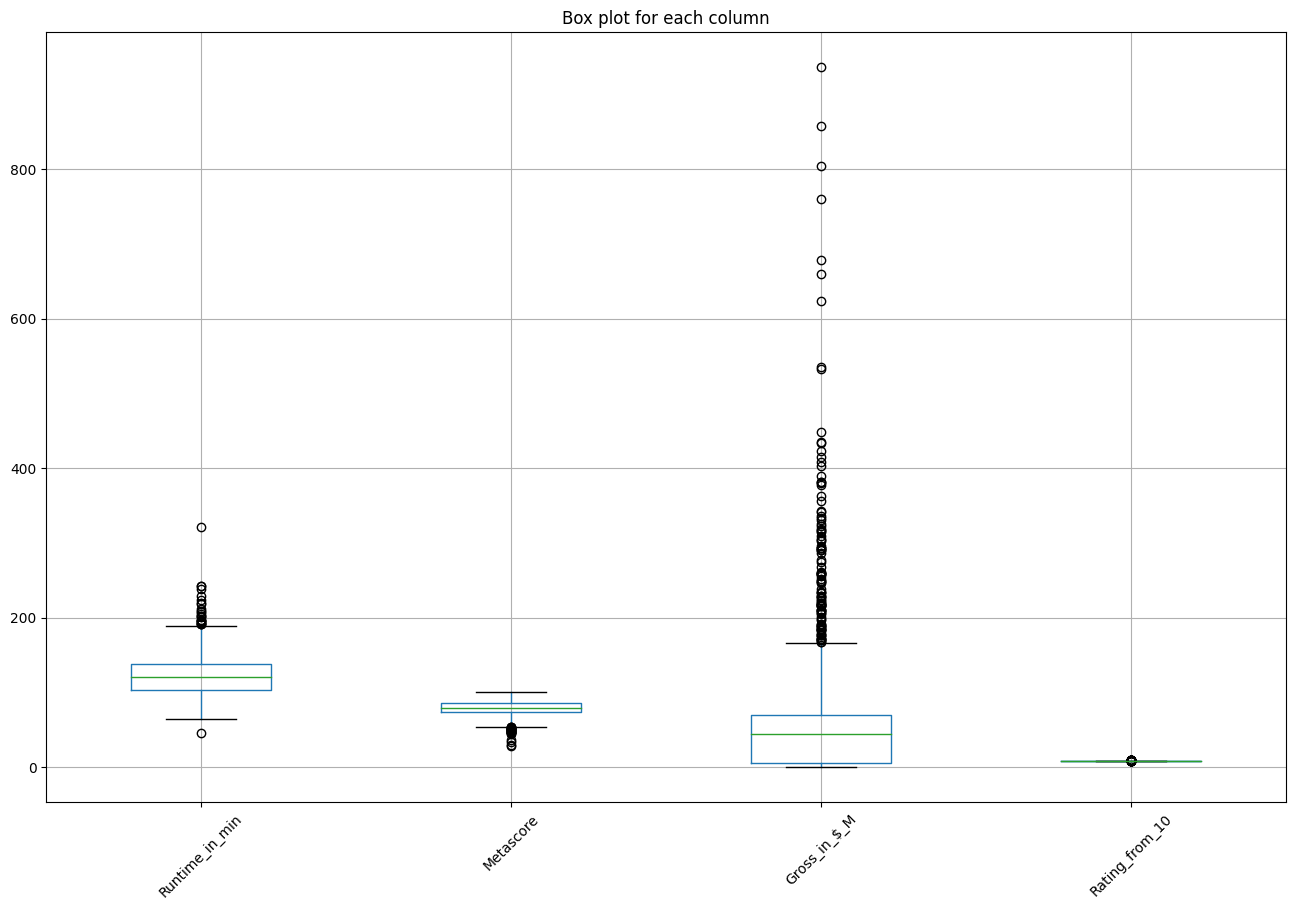

In [35]:
import matplotlib.pyplot as plt

# Select the columns for the box plot
columns = ['Runtime_in_min', 'Metascore', 'Gross_in_$_M', 'Rating_from_10']

# Create a box plot for each column
plt.figure(figsize=(16, 10))
df[columns].boxplot()
plt.xticks(rotation=45)
plt.title('Box plot for each column')
plt.show()


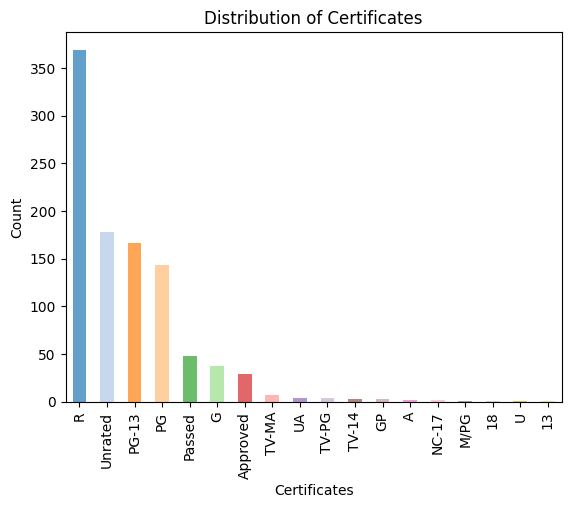

In [36]:
df['Certificate'].value_counts().plot(kind='bar',alpha=0.7,color=plt.cm.tab20.colors)
plt.xlabel('Certificates')
plt.ylabel('Count')
plt.title('Distribution of Certificates')


plt.show()

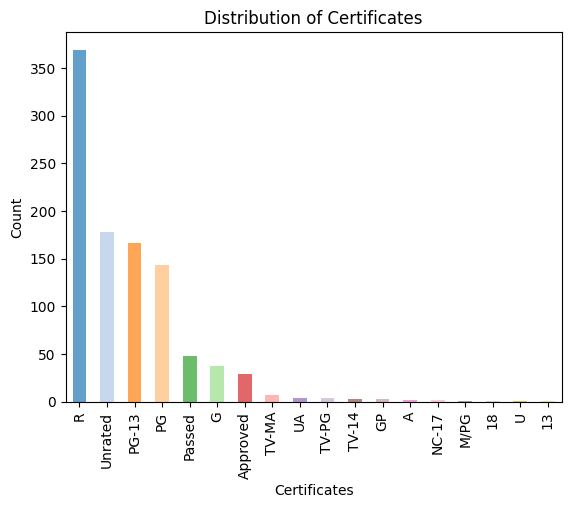

In [37]:
df['Certificate'].value_counts().plot(kind='bar',alpha=0.7,color=plt.cm.tab20.colors)
plt.xlabel('Certificates')
plt.ylabel('Count')
plt.title('Distribution of Certificates')


plt.show()

In [38]:
# plt.figure(figsize=(12, 8))
# sns.violinplot(x='Certificate', y='Rating_from_10', data=df, palette='viridis')
# plt.xlabel('Certificate')
# plt.ylabel('Rating_from_10')
# plt.title('Relationship between Certificates and Ratings')
# plt.xticks(rotation=45)
# plt.show()


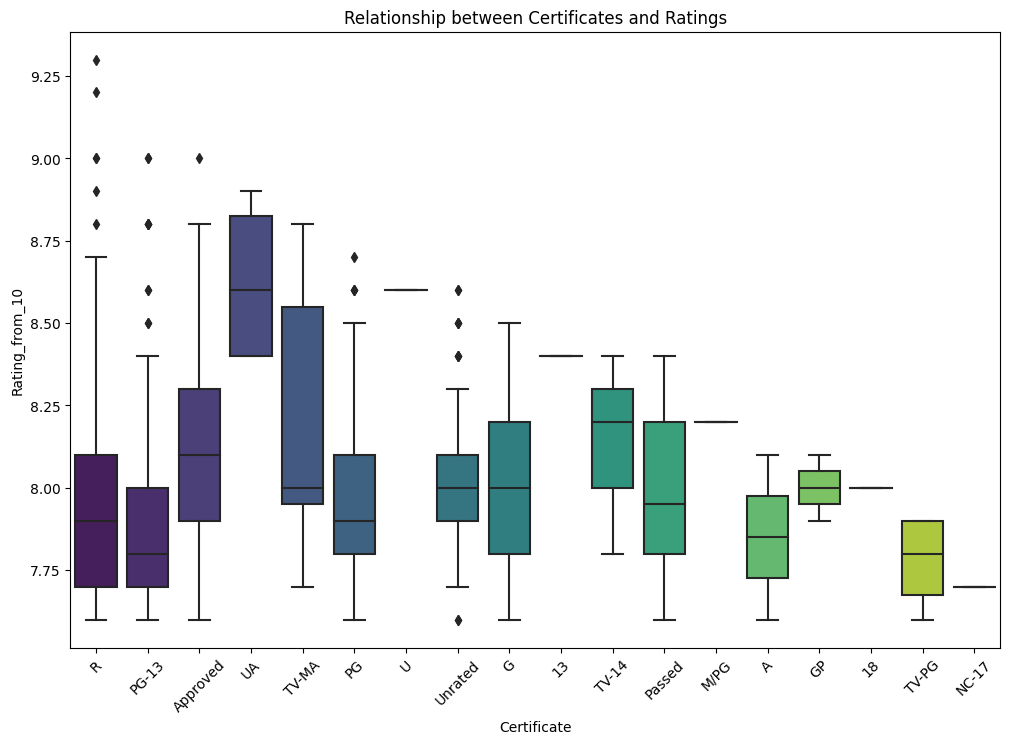

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='Certificate', y='Rating_from_10', data=df, palette='viridis')
plt.xlabel('Certificate')
plt.ylabel('Rating_from_10')
plt.title('Relationship between Certificates and Ratings')
plt.xticks(rotation=45)
plt.show()


General Observations:

The box plots show the distribution of ratings for different types of certificates.
The center line in each box represents the median rating for that certificate type.
The box contains the middle 50% of the data (interquartile range).
The whiskers extend to the most extreme data points within 1.5 times the interquartile range.
Possible Inferences:

-Variations in Ratings Across Certificate Types: There seems to be a variation in median ratings across different certificate types. Some certificate types appear to have consistently higher or lower median ratings compared to others. For instance, the boxplot labeled "GP" might have a higher median rating than "Approved" or "TV-MA". Identify the specific certificate types with the highest and lowest median ratings.

-Distribution of Ratings Within Certificate Types: The size and spread of the boxes and whiskers indicate the distribution of ratings within each certificate type. Wider boxes and longer whiskers suggest a larger spread of ratings, implying more variation in how those certificates are perceived. For example, the boxplot for "TV-PG" might be wider than "M/PG", indicating a more diverse range of ratings for TV-PG certificates.
Additional Considerations:

Look for outliers, which are data points that fall outside the whiskers. These could represent exceptional cases or potential errors and might warrant further investigation.
If you have additional information about the certificate types (e.g., content area, issuing body), you might be able to explain some of the observed variations in ratings.

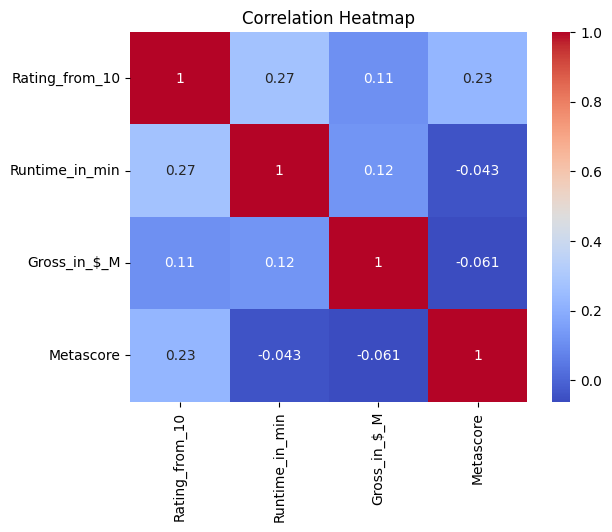

In [40]:
plt.figure(dpi=100)
sns.heatmap(df[['Rating_from_10', 'Runtime_in_min', 'Gross_in_$_M', 'Metascore']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

     The heatmap shows a correlation between ratings (presumably from 1 to 10) and the gross income (in millions of USD) of entities (e.g., movies, products, services). Generally, warmer colors (red/orange) indicate a stronger positive correlation, while cooler colors (blue/green) suggest a weaker or negative correlation.

    Possible Inferences:

    Positive Correlation: There appears to be a positive correlation between ratings and gross income. This means that entities with higher ratings tend to have higher gross income. This aligns with the common notion that higher ratings often translate to better customer reception and potentially higher sales.
    Strength of the Correlation: The intensity of the color in the heatmap indicates the strength of the correlation. The redder areas suggest a stronger positive correlation, meaning ratings play a more significant role in gross income for those entities. Conversely, areas with less intense color (orange or yellow) might indicate a weaker correlation, where other factors besides ratings might influence gross income more.
    Variations Across Rating Ranges: The correlation might not be uniform across all rating ranges. For instance, the increase in gross income for entities with ratings going from 8 to 9 might be stronger than the increase observed between ratings of 5 and 6. Look for areas with steeper color gradients to identify these variations.

In [41]:
colors = sns.color_palette('muted')

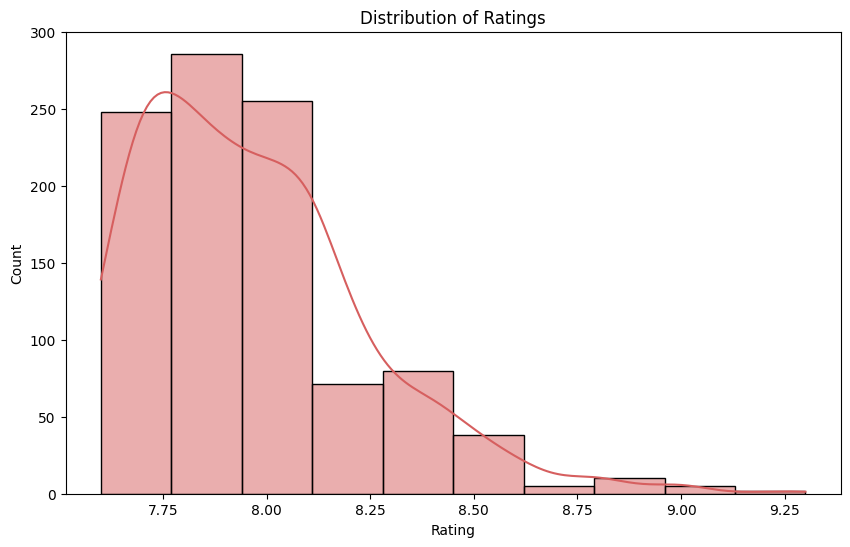

In [42]:
# Histogram of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating_from_10'], bins=10, kde=True,color=colors[3])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

General Observation:

The graph depicts a histogram representing the distribution of movie ratings. The horizontal axis (x-axis) represents the movie rating (likely from 7.75 to 9.25 in increments of 0.25), and the vertical axis (y-axis) shows the number of movies (count) that received each rating.




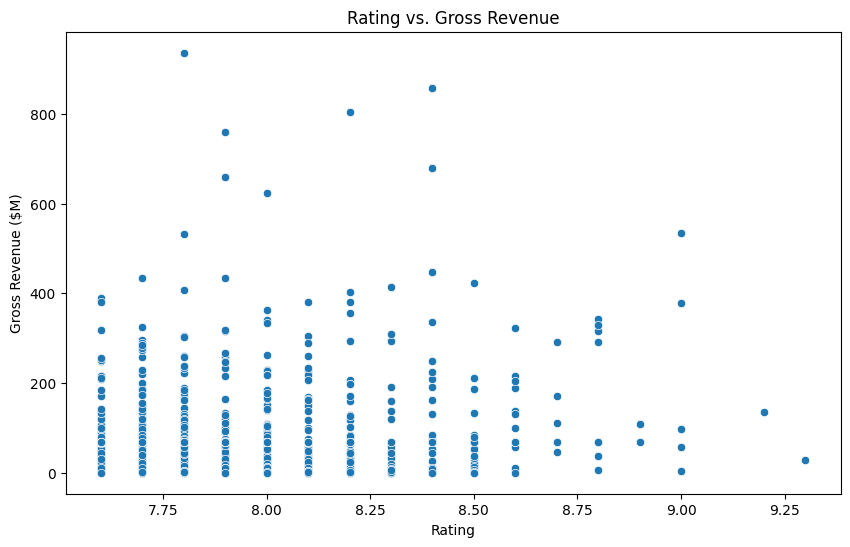

In [43]:
# Scatter Plot of Rating vs. Gross Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating_from_10', y='Gross_in_$_M', data=df)
plt.title('Rating vs. Gross Revenue')
plt.xlabel('Rating')
plt.ylabel('Gross Revenue ($M)')
plt.show()

In [44]:

unique_genres = df['Genre'].str.split(', ').explode().unique()
print(unique_genres)

# Now, we can create dummy variables for each genre using one-hot encoding
genres_dummies = df['Genre'].str.get_dummies(', ')

# Concatenate the dummy variables with the original DataFrame
df_encoded = pd.concat([df, genres_dummies], axis=1)

# Drop the original 'Genre' column if you don't need it anymore
df_encoded.drop('Genre', axis=1, inplace=True)

# Now, df_encoded contains the original data with one-hot encoded genres


['Drama' 'Crime' 'Action' 'Adventure' 'Biography' 'History' 'Comedy'
 'Mystery' 'Sci-Fi' 'Romance' 'Western' 'Fantasy' 'Animation' 'Family'
 'War' 'Thriller' 'Music' 'Horror' 'Film-Noir' 'Musical' 'Sport']


In [130]:
#df_encoded.drop('Rank',axis=1,inplace=True)

In [45]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie_name      1000 non-null   object 
 1   Year            1000 non-null   object 
 2   Certificate     1000 non-null   object 
 3   Runtime_in_min  1000 non-null   int64  
 4   Metascore       1000 non-null   float64
 5   Gross_in_$_M    1000 non-null   float64
 6   Rating_from_10  1000 non-null   float64
 7   Action          1000 non-null   int64  
 8   Adventure       1000 non-null   int64  
 9   Animation       1000 non-null   int64  
 10  Biography       1000 non-null   int64  
 11  Comedy          1000 non-null   int64  
 12  Crime           1000 non-null   int64  
 13  Drama           1000 non-null   int64  
 14  Family          1000 non-null   int64  
 15  Fantasy         1000 non-null   int64  
 16  Film-Noir       1000 non-null   int64  
 17  History         1000 non-null   in

In [46]:
mean_meta = df_encoded['Metascore'].mean()
df_encoded['Metascore'] = df_encoded['Metascore'].fillna(mean_meta)
df_encoded['Gross_in_$_M'] = pd.to_numeric(df['Gross_in_$_M'], errors='coerce')

# Fill missing values with the mean
mean_gross = df_encoded['Gross_in_$_M'].mean()
df_encoded['Gross_in_$_M'] = df_encoded['Gross_in_$_M'].fillna(mean_gross)

most_common_certificate = df_encoded['Certificate'].mode()[0]
df_encoded['Certificate'] = df_encoded['Certificate'].fillna(most_common_certificate)



In [47]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie_name      1000 non-null   object 
 1   Year            1000 non-null   object 
 2   Certificate     1000 non-null   object 
 3   Runtime_in_min  1000 non-null   int64  
 4   Metascore       1000 non-null   float64
 5   Gross_in_$_M    1000 non-null   float64
 6   Rating_from_10  1000 non-null   float64
 7   Action          1000 non-null   int64  
 8   Adventure       1000 non-null   int64  
 9   Animation       1000 non-null   int64  
 10  Biography       1000 non-null   int64  
 11  Comedy          1000 non-null   int64  
 12  Crime           1000 non-null   int64  
 13  Drama           1000 non-null   int64  
 14  Family          1000 non-null   int64  
 15  Fantasy         1000 non-null   int64  
 16  Film-Noir       1000 non-null   int64  
 17  History         1000 non-null   in

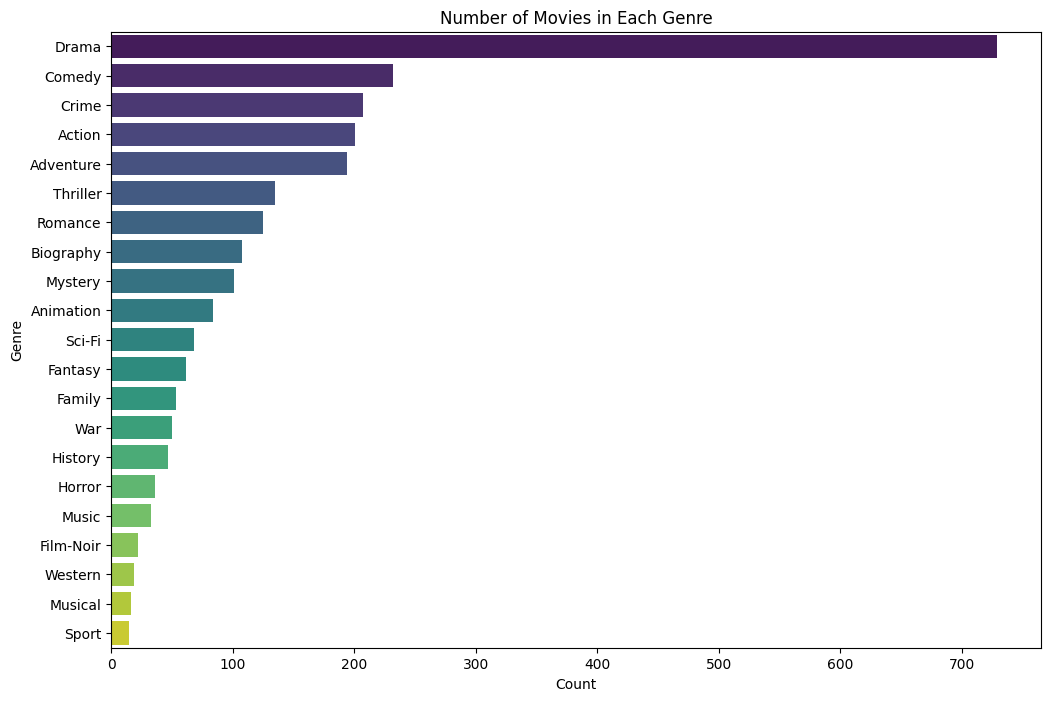

In [48]:
genre_counts = df_encoded.iloc[:, 7:].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Number of Movies in Each Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


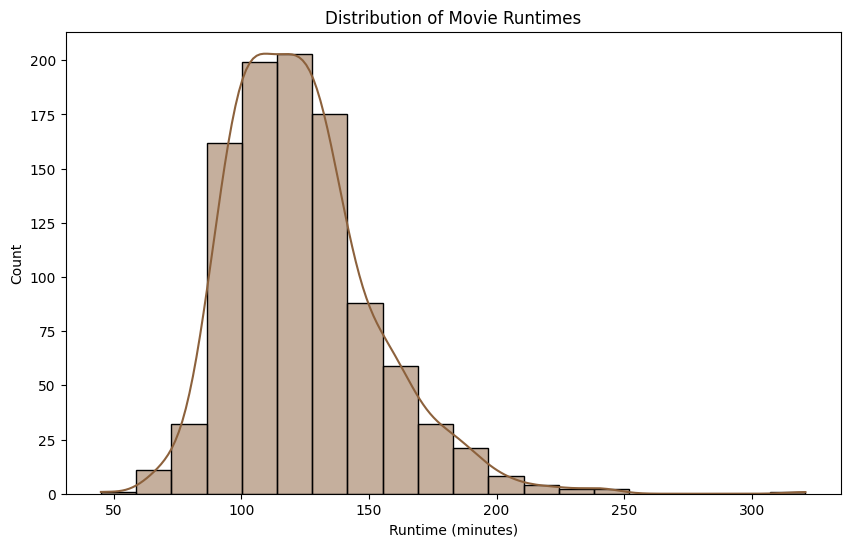

In [49]:
# Runtime Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Runtime_in_min'], bins=20, kde=True,color=colors[5])
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

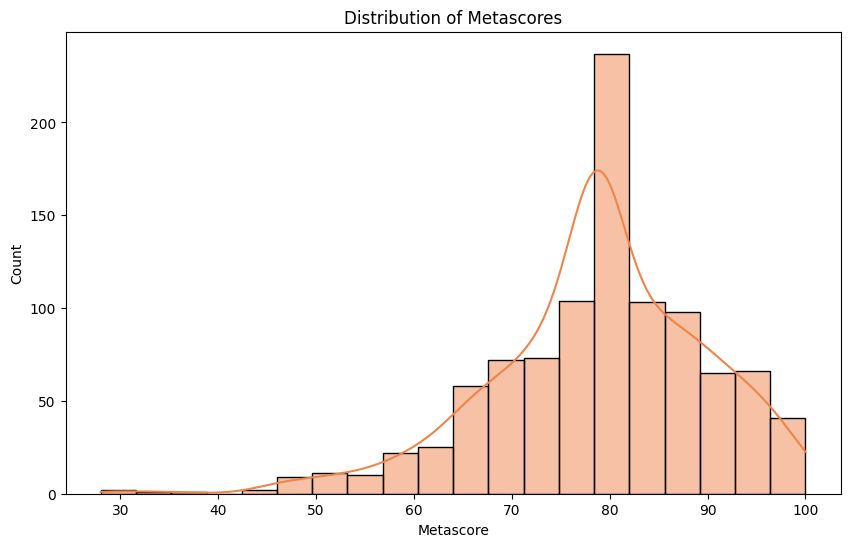

In [50]:
# Metascore Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Metascore'], bins=20, kde=True,color=colors[1])
plt.title('Distribution of Metascores')
plt.xlabel('Metascore')
plt.ylabel('Count')
plt.show()

In [51]:
# Calculate skewness 
skewness = df[['Runtime_in_min', 'Metascore', 'Rating_from_10']].skew()


print(skewness)


Runtime_in_min    1.126825
Metascore        -0.670012
Rating_from_10    1.074884
dtype: float64


we can see that:
- The 'Runtime_in_min' column has a skewness of approximately 1.13, indicating a right-skewed distribution. This means that there are more movies with shorter runtimes and fewer movies with longer runtimes.
- The 'Metascore' column has a skewness of approximately -0.61, indicating a slight left-skewed distribution. This means that there are more movies with lower Metascores and fewer movies with higher Metascores.
- The 'Rating_from_10' column's skewness is not provided. It seems there was an error in calculating or displaying this value. Please check the calculation and try again to interpret the skewness of the rating data.

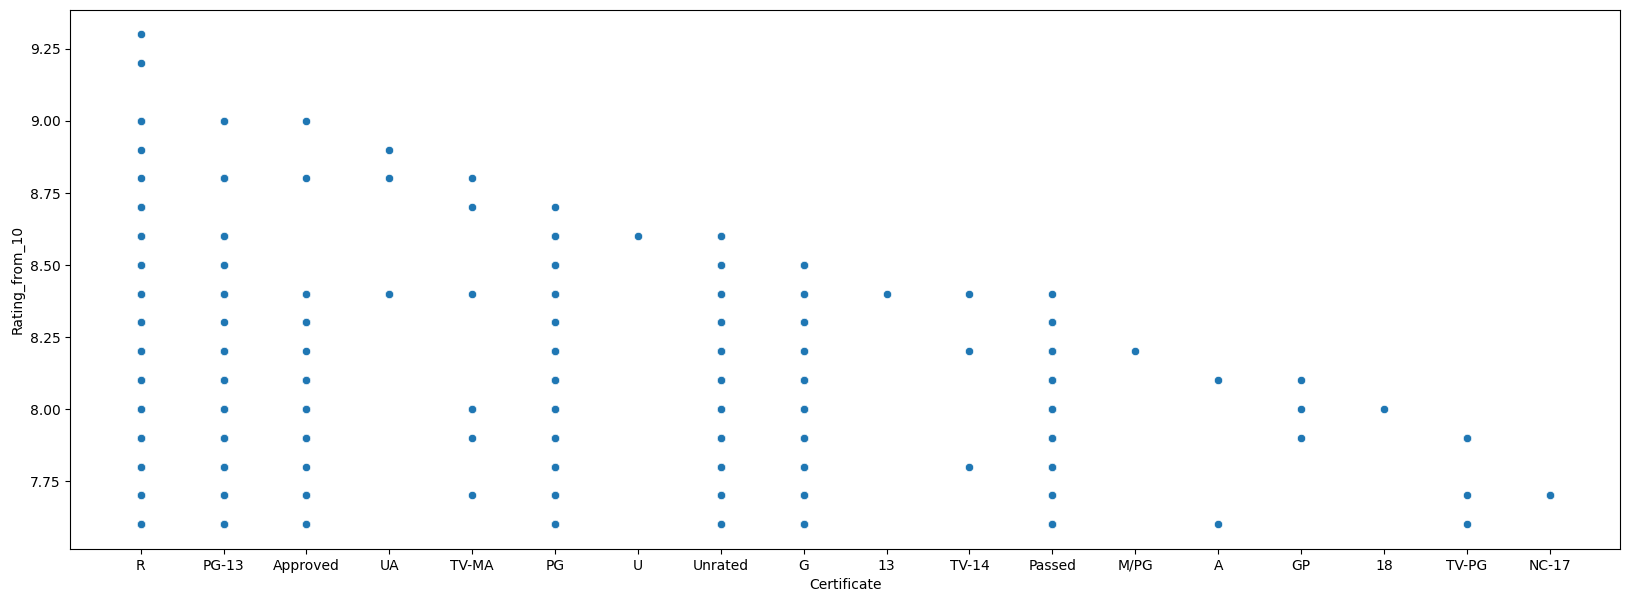

In [52]:
plt.figure(figsize=(20,7))
sns.scatterplot(x='Certificate',y='Rating_from_10',data=df)
plt.show()

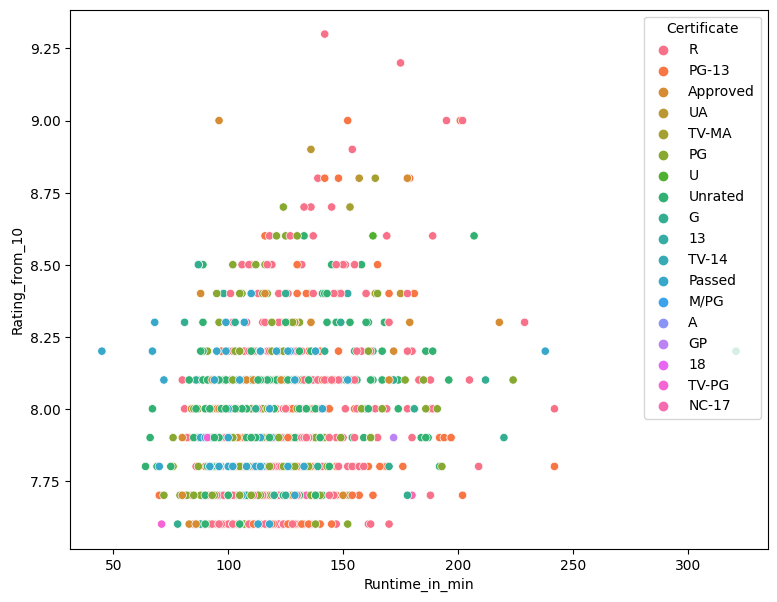

In [53]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='Runtime_in_min',y='Rating_from_10',data=df,hue='Certificate')
plt.show()

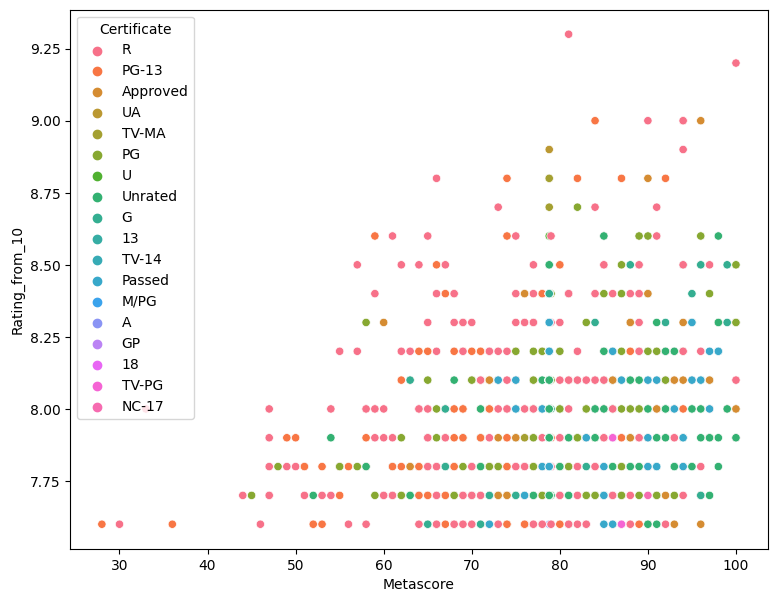

In [54]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='Metascore',y='Rating_from_10',data=df,hue='Certificate')
plt.show()

## Gross_in_$_M vs Rating

In [141]:
# plt.figure(figsize=(10,7))
# sns.scatterplot(x='Gross_in_$_M',y='Rating_from_10',data=df,color=colors[6],jitter=True)
# plt.title('Movie Revenue vs. Rating')
# plt.xlabel('Revenue ($M)')
# plt.ylabel('Rating')
# plt.show()
#     plt.figure(figsize=(10, 6))
#     sns.stripplot(x='Gross_in_$_M', y='Rating_from_10', data=df, jitter=0.3, alpha=0.5)
#     plt.title('Movie Gross Revenue vs. Rating')
#     plt.xlabel('Gross Revenue ($M)')
#     plt.ylabel('Rating')
#     plt.show()


In [55]:
df_encoded['Gross_in_$_M'] = df_encoded['Gross_in_$_M'].astype(str)
df_encoded['Gross_in_$_M'] = df_encoded['Gross_in_$_M'].str.lstrip('#')



In [56]:
df_encoded['Gross_in_$_M'] = pd.to_numeric(df_encoded['Gross_in_$_M'])
mean_gross = df_encoded['Gross_in_$_M'].mean()
df_encoded['Gross_in_$_M'] = df_encoded['Gross_in_$_M'].fillna(mean_gross)


In [57]:
df_encoded['Year'] = df_encoded['Year'].str.strip('I')
df_encoded['Year'] = df_encoded['Year'].str.strip('II')
df_encoded['Year'] = df_encoded['Year'].str.strip('III')

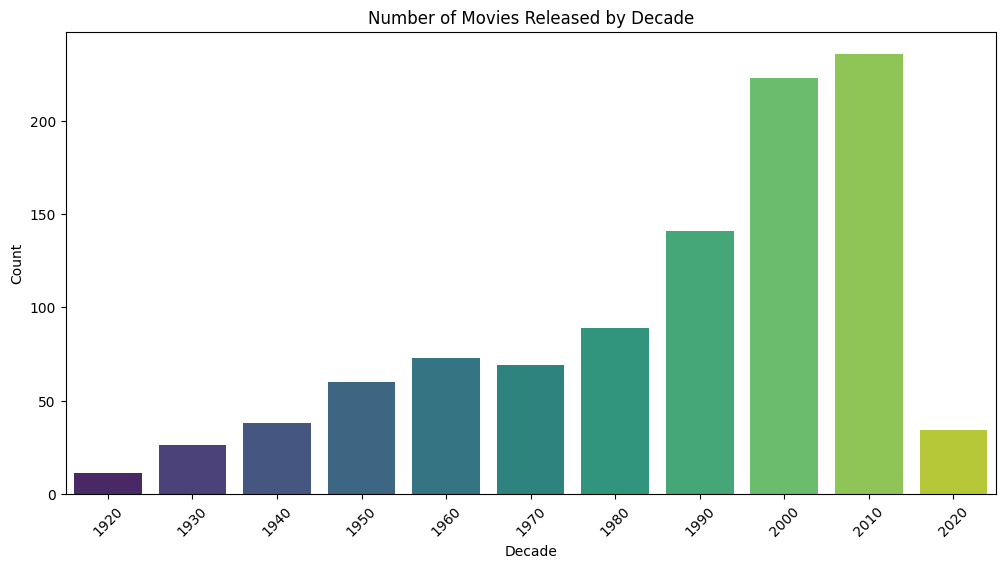

In [58]:
# Convert 'Year' column to integers
df_encoded['Year'] = df_encoded['Year'].astype(int)

# Convert release year to decade
df_encoded['Decade'] = (df_encoded['Year'] // 10) * 10

# Plot the count of movies released in each decade
plt.figure(figsize=(12, 6))
sns.countplot(x='Decade', data=df_encoded, palette='viridis')
plt.title('Number of Movies Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


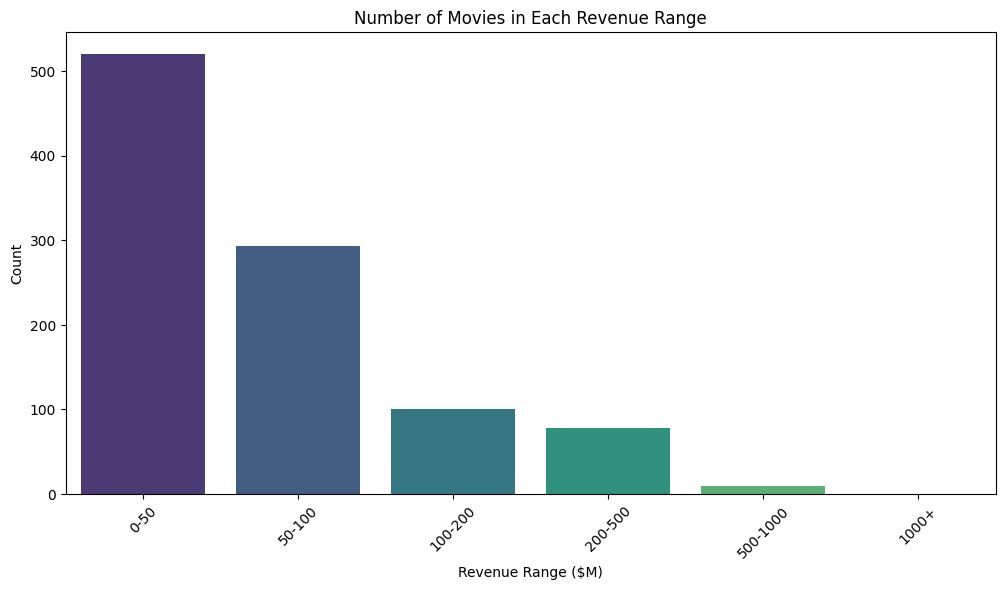

In [59]:
# Convert 'Gross_in_$_M' column to integers
df_encoded['Gross_in_$_M'] = df_encoded['Gross_in_$_M'].astype(float)

# Define bins for revenue ranges
revenue_bins = [0, 50, 100, 200, 500, 1000, np.inf]
revenue_labels = ['0-50', '50-100', '100-200', '200-500', '500-1000', '1000+']

# Create a new column for revenue range
df_encoded['Revenue_Range'] = pd.cut(df_encoded['Gross_in_$_M'], bins=revenue_bins, labels=revenue_labels, right=False)

# Plot count of movies in each revenue range
plt.figure(figsize=(12, 6))
sns.countplot(x='Revenue_Range', data=df_encoded, palette='viridis')
plt.title('Number of Movies in Each Revenue Range')
plt.xlabel('Revenue Range ($M)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


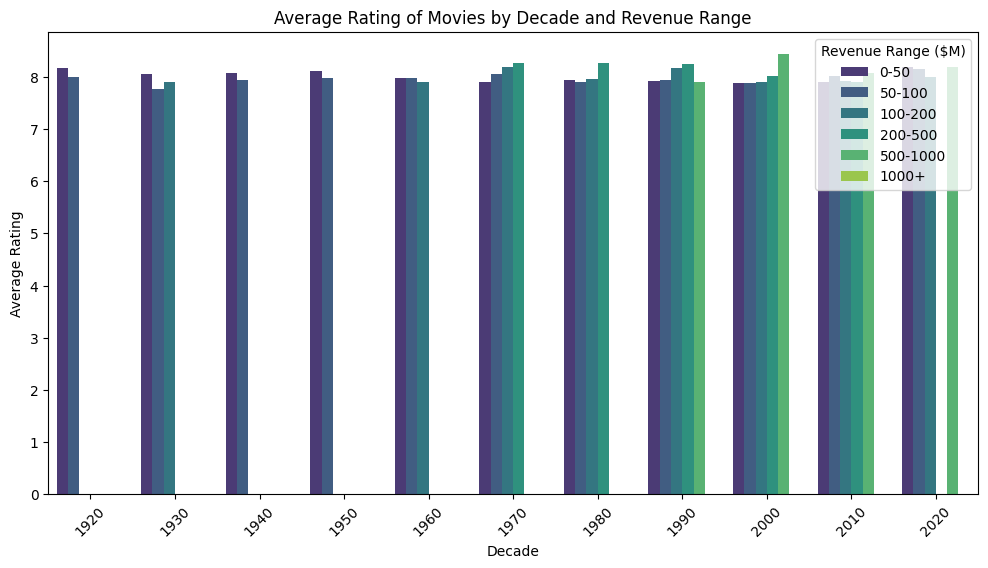

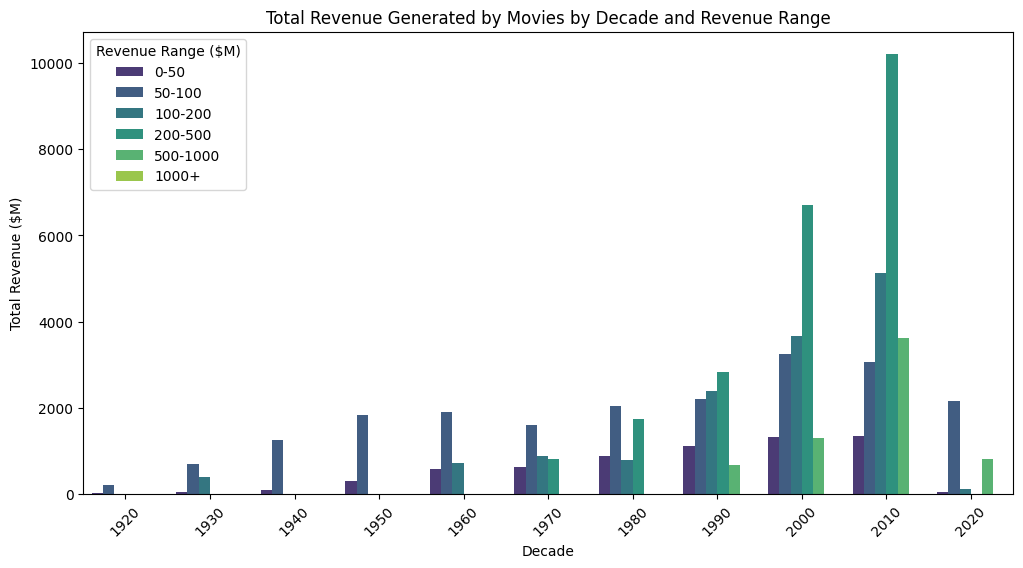

In [60]:
# Define bins for revenue ranges
revenue_bins = [0, 50, 100, 200, 500, 1000, np.inf]
revenue_labels = ['0-50', '50-100', '100-200', '200-500', '500-1000', '1000+']

# Create a new column for revenue range
df_encoded['Revenue_Range'] = pd.cut(df_encoded['Gross_in_$_M'], bins=revenue_bins, labels=revenue_labels, right=False)

# Calculate average rating and total revenue for each decade and revenue range
decade_revenue_stats = df_encoded.groupby(['Decade', 'Revenue_Range']).agg({
    'Rating_from_10': 'mean',
    'Gross_in_$_M': 'sum'
}).reset_index()

# Plot average rating by decade and revenue range
plt.figure(figsize=(12, 6))
sns.barplot(x='Decade', y='Rating_from_10', hue='Revenue_Range', data=decade_revenue_stats, palette='viridis')
plt.title('Average Rating of Movies by Decade and Revenue Range')
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Revenue Range ($M)')
plt.show()

# Plot total revenue by decade and revenue range
plt.figure(figsize=(12, 6))
sns.barplot(x='Decade', y='Gross_in_$_M', hue='Revenue_Range', data=decade_revenue_stats, palette='viridis')
plt.title('Total Revenue Generated by Movies by Decade and Revenue Range')
plt.xlabel('Decade')
plt.ylabel('Total Revenue ($M)')
plt.xticks(rotation=45)
plt.legend(title='Revenue Range ($M)')
plt.show()



In [62]:
# plt.figure(figsize=(10, 6))
# sns.stripplot(x='Revenue_Range', y='Rating_from_10', data=df_encoded, alpha=0.5,hue='Decade', palette='viridis')
# plt.title('Movie Gross Revenue vs. Rating')
# plt.xlabel('Gross Revenue Range ($M)')
# plt.ylabel('Rating')
# plt.xticks(rotation=45)
# plt.show()


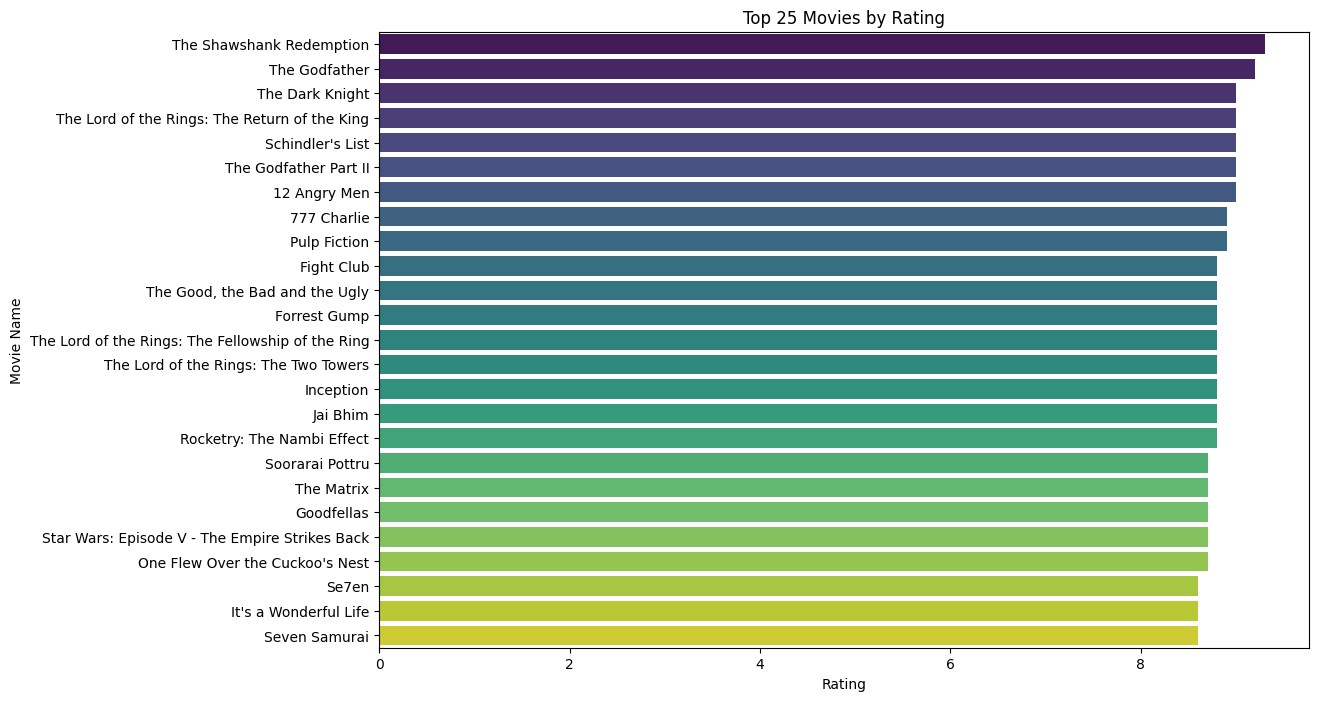

In [63]:
# Sort the DataFrame by rating in descending order
top_25_movies = df_encoded.sort_values(by='Rating_from_10', ascending=False).head(25)

# Visualize the top 25 movies by rating
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating_from_10', y='Movie_name', data=top_25_movies, palette='viridis')
plt.title('Top 25 Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.show()


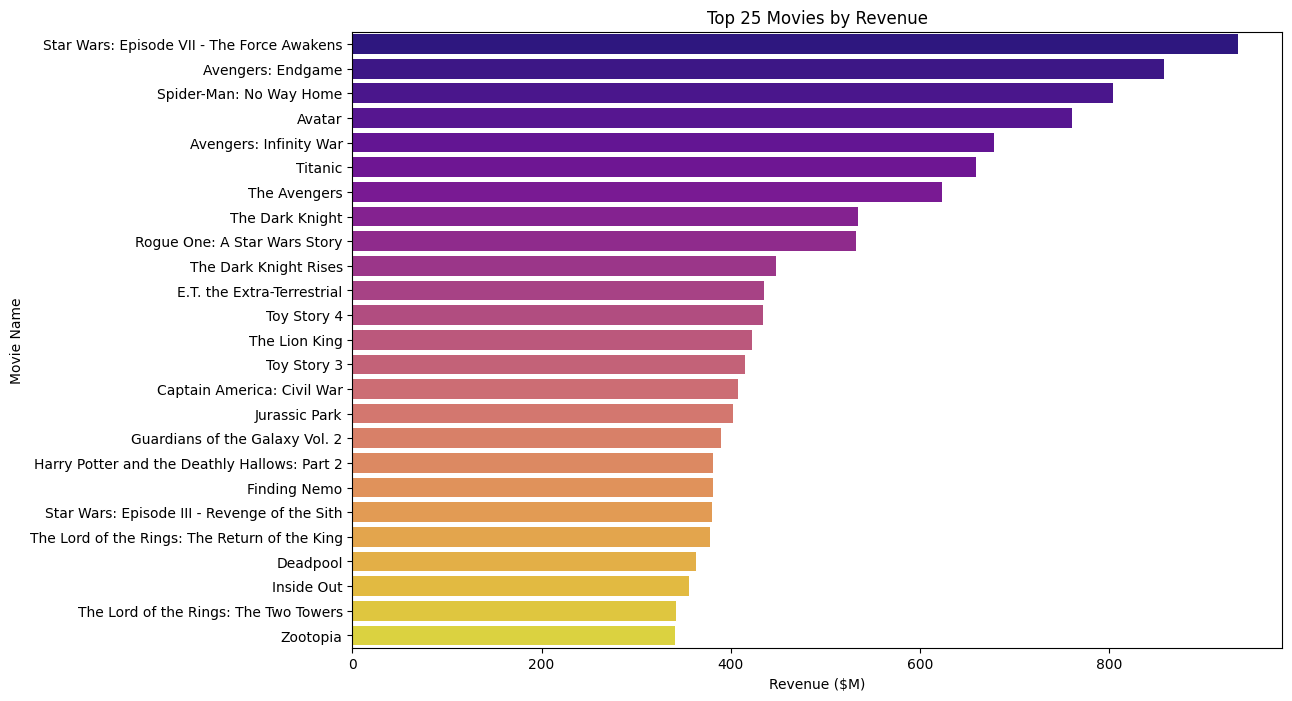

In [64]:
# Sort the DataFrame by revenue in descending order
top_25_movies_revenue = df_encoded.sort_values(by='Gross_in_$_M', ascending=False).head(25)

# Visualize the top 25 movies by revenue
plt.figure(figsize=(12, 8))
sns.barplot(x='Gross_in_$_M', y='Movie_name', data=top_25_movies_revenue, palette='plasma')
plt.title('Top 25 Movies by Revenue')
plt.xlabel('Revenue ($M)')
plt.ylabel('Movie Name')
plt.show()


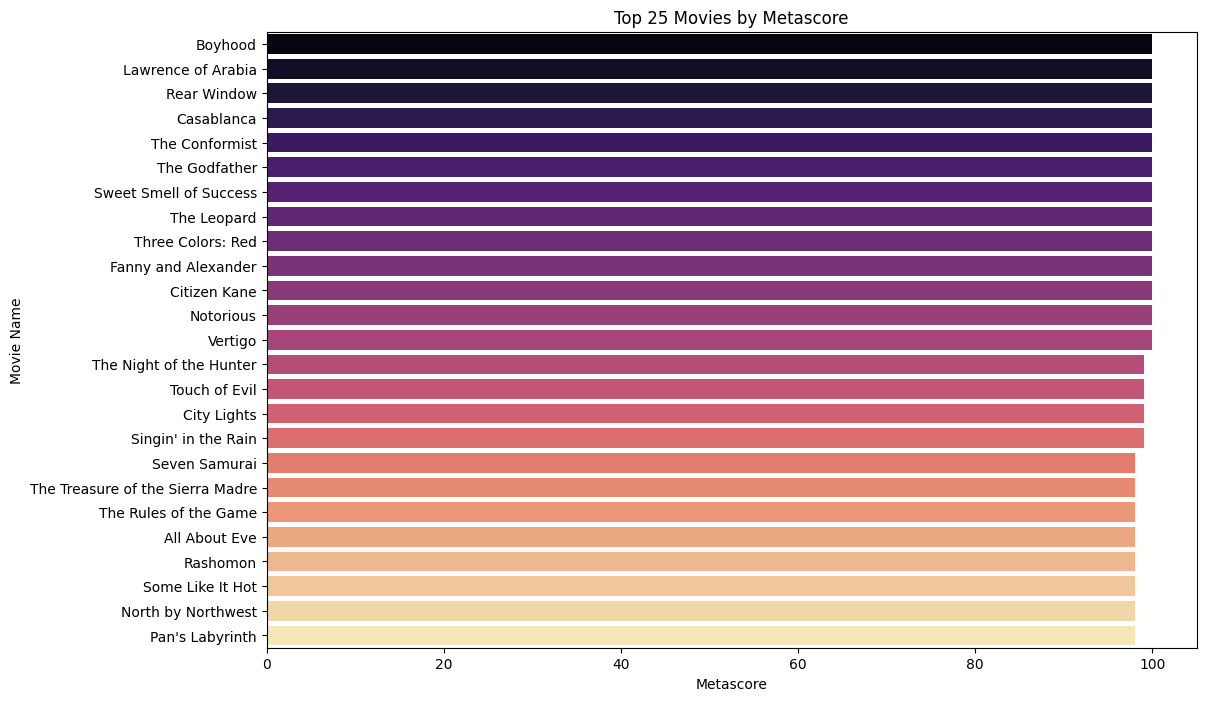

In [65]:
top_25_movies_metascore = df_encoded.sort_values(by='Metascore', ascending=False).head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x='Metascore', y='Movie_name', data=top_25_movies_metascore, palette='magma')
plt.title('Top 25 Movies by Metascore')
plt.xlabel('Metascore')
plt.ylabel('Movie Name')
plt.show()


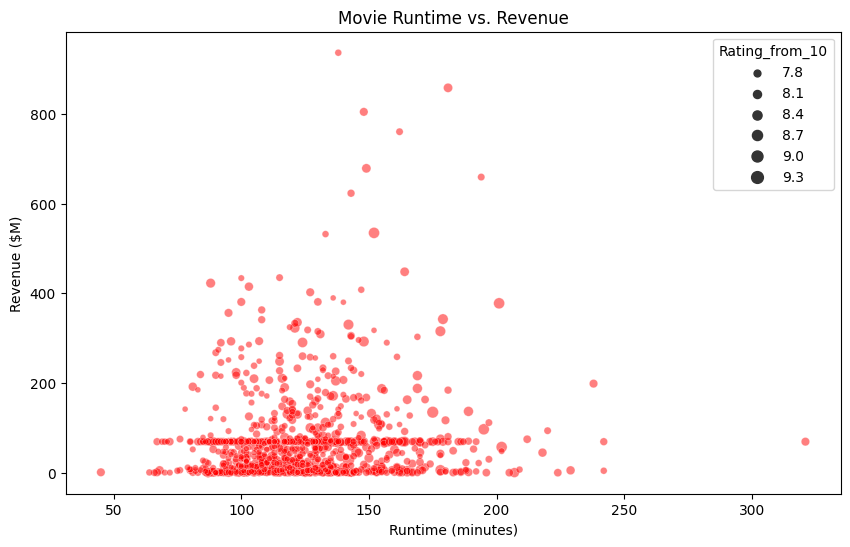

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime_in_min', y='Gross_in_$_M', data=df_encoded, alpha=0.5,color='red',size='Rating_from_10')
plt.title('Movie Runtime vs. Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue ($M)')
plt.show()


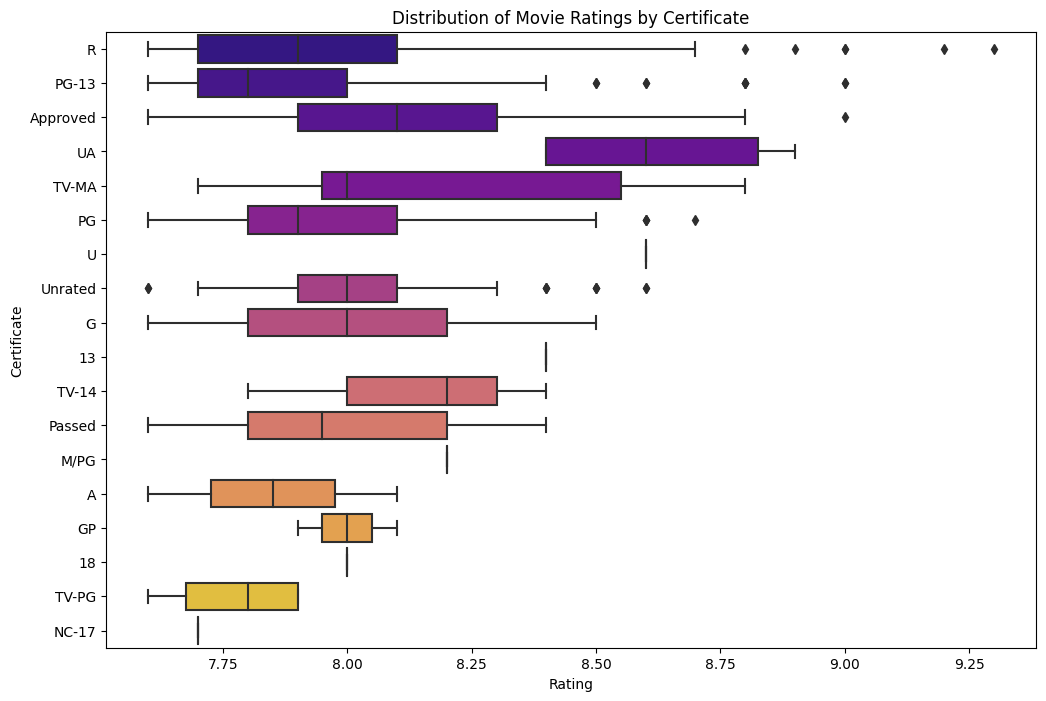

In [67]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Rating_from_10', y='Certificate', data=df_encoded, palette='plasma')
plt.title('Distribution of Movie Ratings by Certificate')
plt.xlabel('Rating')
plt.ylabel('Certificate')
plt.show()


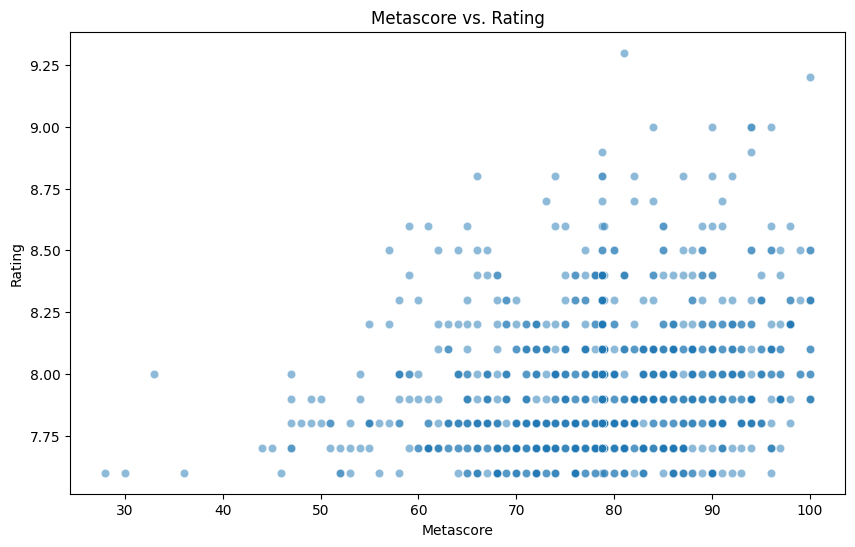

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Metascore', y='Rating_from_10', data=df_encoded, alpha=0.5)
plt.title('Metascore vs. Rating')
plt.xlabel('Metascore')
plt.ylabel('Rating')
plt.show()


In [69]:
# plt.figure(figsize=(12, 8))
# sns.violinplot(x='Decade', y='Metascore', data=df_encoded, palette='viridis', inner='quartile')
# plt.title('Distribution of Metascore by Decade')
# plt.xlabel('Decade')
# plt.ylabel('Metascore')
# plt.xticks(rotation=45)
# plt.show()


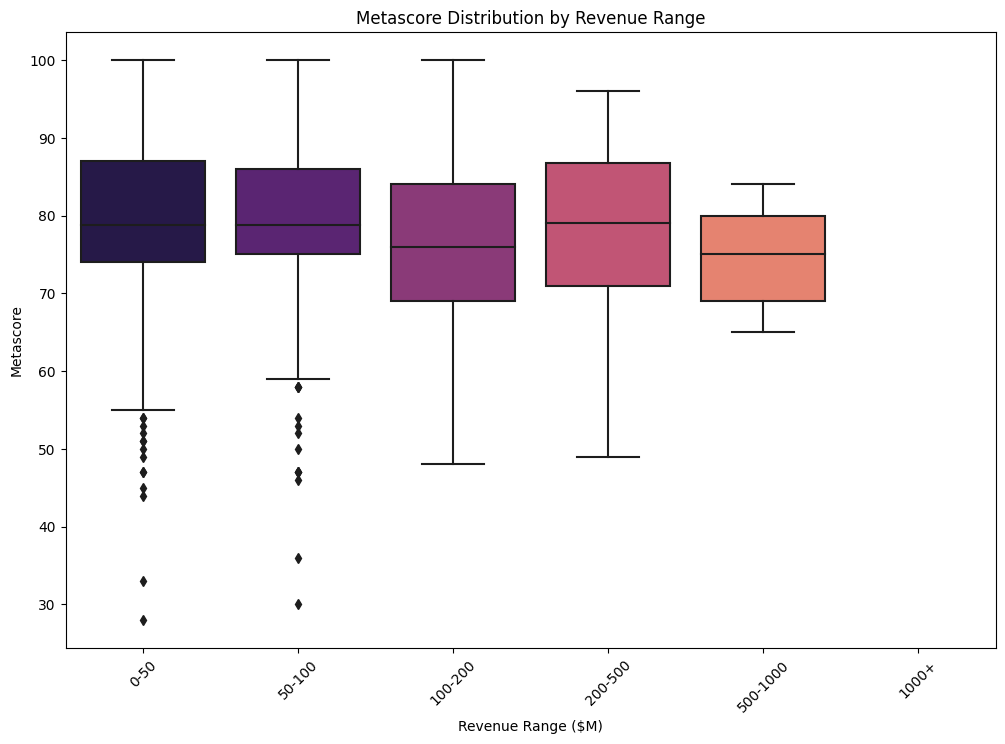

In [70]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Revenue_Range', y='Metascore', data=df_encoded, palette='magma')
plt.title('Metascore Distribution by Revenue Range')
plt.xlabel('Revenue Range ($M)')
plt.ylabel('Metascore')
plt.xticks(rotation=45)
plt.show()


In [71]:
genres = ['Drama', 'Crime', 'Action', 'Adventure', 'Biography', 'History', 
          'Comedy', 'Mystery', 'Sci-Fi', 'Romance', 'Western', 'Fantasy', 
          'Animation', 'Family', 'War', 'Thriller', 'Music', 'Horror', 
          'Film-Noir', 'Musical', 'Sport']

# Initialize a DataFrame to store the top 10 movies for each genre
top_movies_by_genre = pd.DataFrame(columns=['Genre', 'Movie_name', 'Rating_from_10'])

# Iterate over each genre
for genre in genres:
    # Get the top 10 movies for the current genre based on rating
    top_movies = df_encoded[df_encoded[genre] == 1].nlargest(10, 'Rating_from_10')[['Movie_name', 'Rating_from_10']]
    top_movies['Genre'] = genre
    top_movies_by_genre = pd.concat([top_movies_by_genre, top_movies])

# Reset the index of the DataFrame
top_movies_by_genre.reset_index(drop=True, inplace=True)

# Display the top 10 movies for each genre
top_movies_by_genre


,Genre,Movie_name,Rating_from_10
0,Drama,The Shawshank Redemption,9.3
1,Drama,The Godfather,9.2
2,Drama,The Dark Knight,9.0
3,Drama,The Lord of the Rings: The Return of the King,9.0
4,Drama,Schindler's List,9.0
...,...,...,...
205,Sport,Million Dollar Baby,8.1
206,Sport,Lagaan: Once Upon a Time in India,8.1
207,Sport,Rocky,8.1
208,Sport,The Hustler,8.0


ValueError: num must be an integer with 1 <= num <= 18, not 19

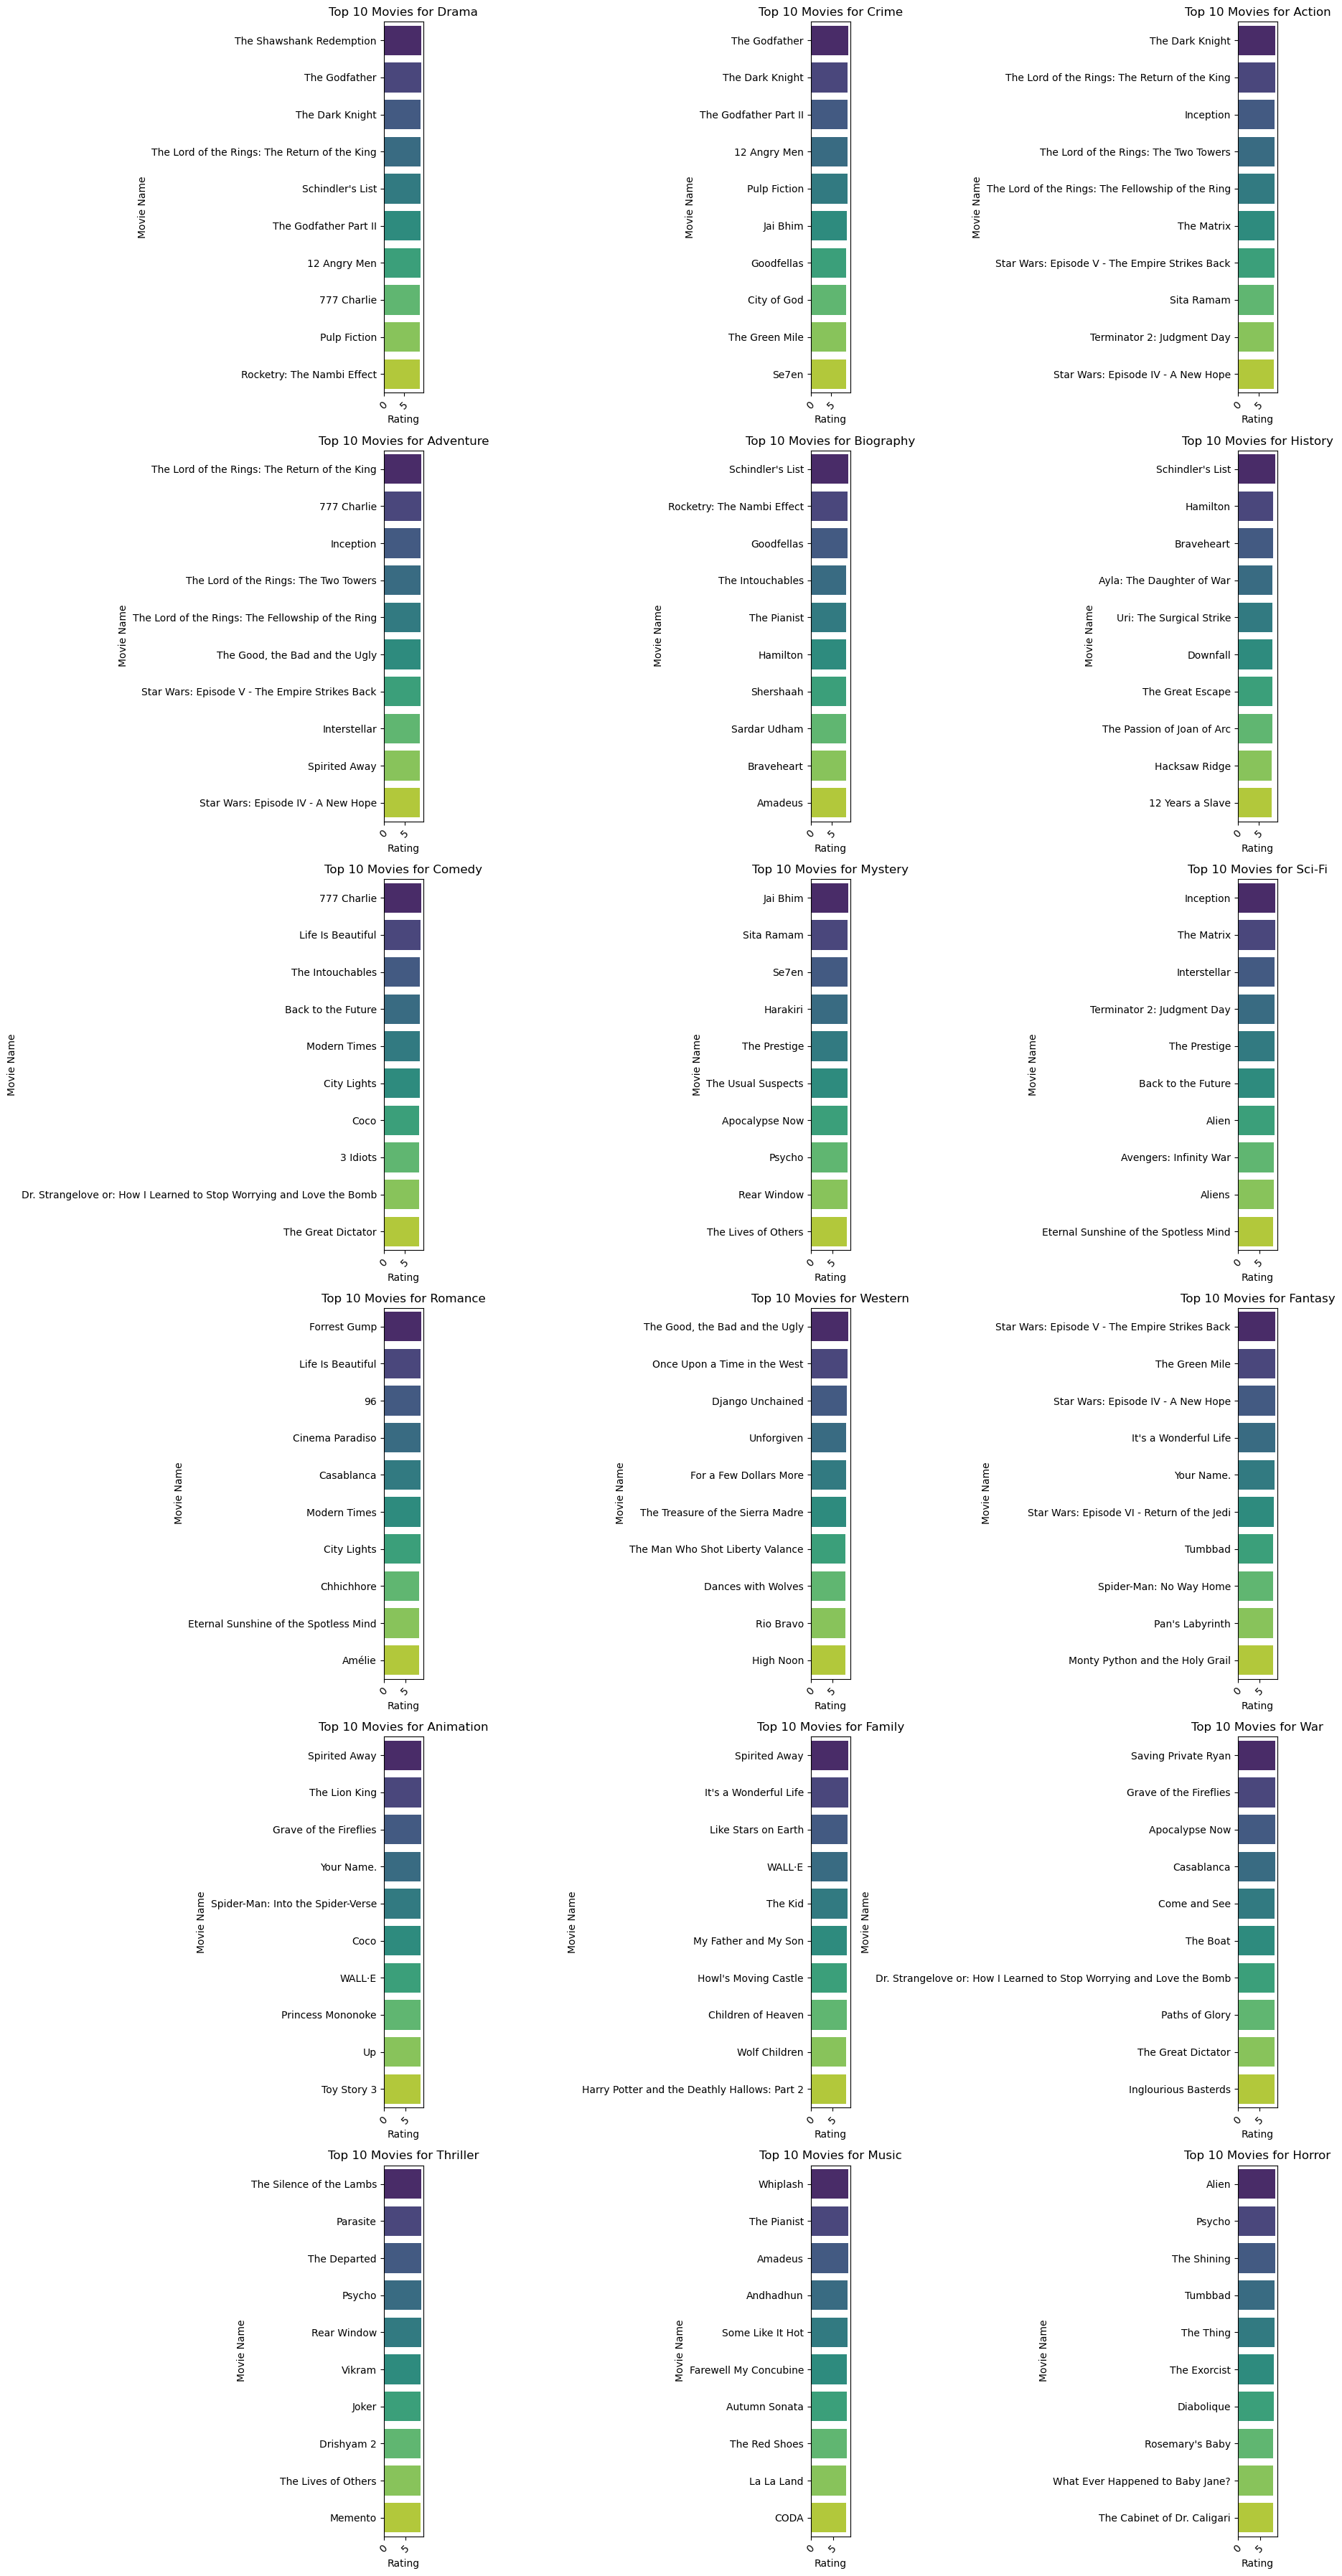

In [158]:
plt.figure(figsize=(18, 36))

# Iterate over each genre
for i, genre in enumerate(genres):
    # Get the top 10 movies for the current genre based on rating
    top_movies = df_encoded[df_encoded[genre] == 1].nlargest(10, 'Rating_from_10')[['Movie_name', 'Rating_from_10']]
    
    # Create a subplot for the current genre
    plt.subplot(6, 3, i+1)
    sns.barplot(x='Rating_from_10', y='Movie_name', data=top_movies, palette='viridis')
    plt.title(f'Top 10 Movies for {genre}')
    plt.xlabel('Rating')
    plt.ylabel('Movie Name')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


In [72]:
# plt.figure(figsize=(16, 8))
# sns.violinplot(x='Rating_from_10', y='Decade', data=df_encoded, palette='cividis')
# plt.title('Distribution of IMDb Scores Across Ratings and Decades')
# plt.xlabel('IMDb Score')
# plt.ylabel('Decade')
# plt.show()


In [75]:
# plt.figure(figsize=(12, 8))
# sns.kdeplot(x='Rating_from_10', y='Decade', data=df_encoded, cmap='cividis', fill=True)
# plt.title('Density of IMDb Scores Across Ratings and Decades')
# plt.xlabel('IMDb Score')
# plt.ylabel('Decade')
# plt.legend()
# plt.show()

# plt.figure(figsize=(12, 8))
# sns.kdeplot(x='Rating_from_10', y='Decade', data=df_encoded, cmap='cividis', fill=True, cbar=True)
# plt.title('Density of IMDb Scores Across Ratings and Decades')
# plt.xlabel('IMDb Score')
# plt.ylabel('Decade')
# plt.show()


In [161]:
# # Calculate the average rating for each genre
# genre_rating = df_encoded.groupby(df_encoded.columns[7:], as_index=False)['Rating_from_10'].mean()

# # Create a pivot table for genres and ratings
# genre_rating_pivot = genre_rating.pivot_table(index='Genre_Action', columns='Genre_Adventure', values='Rating_from_10')

# # Create a heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(genre_rating_pivot, cmap='viridis', annot=True, fmt=".2f")
# plt.title('Average Rating for Each Genre Combination')
# plt.xlabel('Genre Adventure')
# plt.ylabel('Genre Action')
# plt.show()




In [162]:
# # Select genre columns
# genre_columns = df_encoded.columns[7:]

# # Calculate the average rating for each genre
# genre_rating = df_encoded.groupby(genre_columns)['Rating_from_10'].mean().reset_index()

# # Pivot the data to create a heatmap
# genre_rating_pivot = genre_rating.pivot_table(index='Rating_from_10', columns=genre_columns)

# # Create a heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(genre_rating_pivot, cmap='viridis', annot=True, fmt=".2f")
# plt.title('Average Rating for Each Genre')
# plt.xlabel('Genre')
# plt.ylabel('Rating')
# plt.show()


In [78]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Movie_name      1000 non-null   object  
 1   Year            1000 non-null   int64   
 2   Certificate     1000 non-null   object  
 3   Runtime_in_min  1000 non-null   int64   
 4   Metascore       1000 non-null   float64 
 5   Gross_in_$_M    1000 non-null   float64 
 6   Rating_from_10  1000 non-null   float64 
 7   Action          1000 non-null   int64   
 8   Adventure       1000 non-null   int64   
 9   Animation       1000 non-null   int64   
 10  Biography       1000 non-null   int64   
 11  Comedy          1000 non-null   int64   
 12  Crime           1000 non-null   int64   
 13  Drama           1000 non-null   int64   
 14  Family          1000 non-null   int64   
 15  Fantasy         1000 non-null   int64   
 16  Film-Noir       1000 non-null   int64   
 17  History        

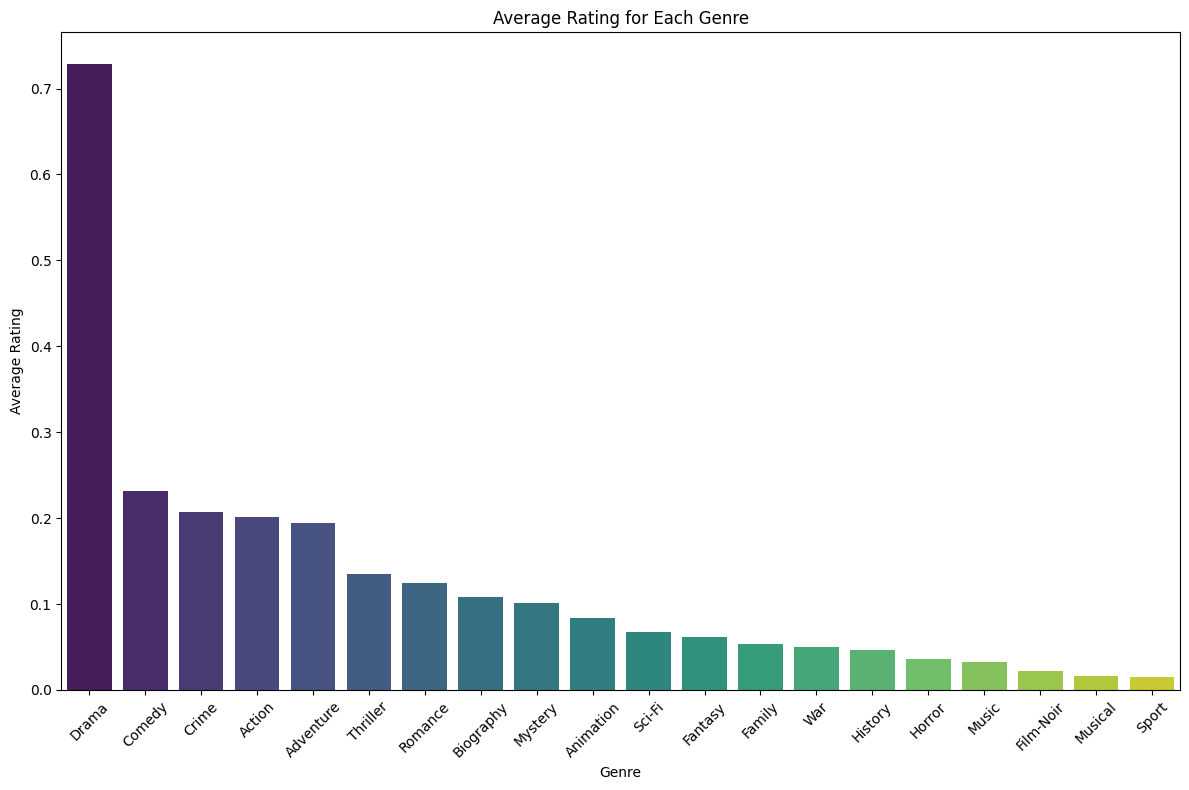

In [80]:
genre_avg_rating = df_encoded.iloc[:, 7:27].mean()

# Sort genres by average rating
genre_avg_rating_sorted = genre_avg_rating.sort_values(ascending=False)

# Create a bar plot to visualize the average rating for each genre
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_avg_rating_sorted.index, y=genre_avg_rating_sorted.values, palette='viridis')
plt.title('Average Rating for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

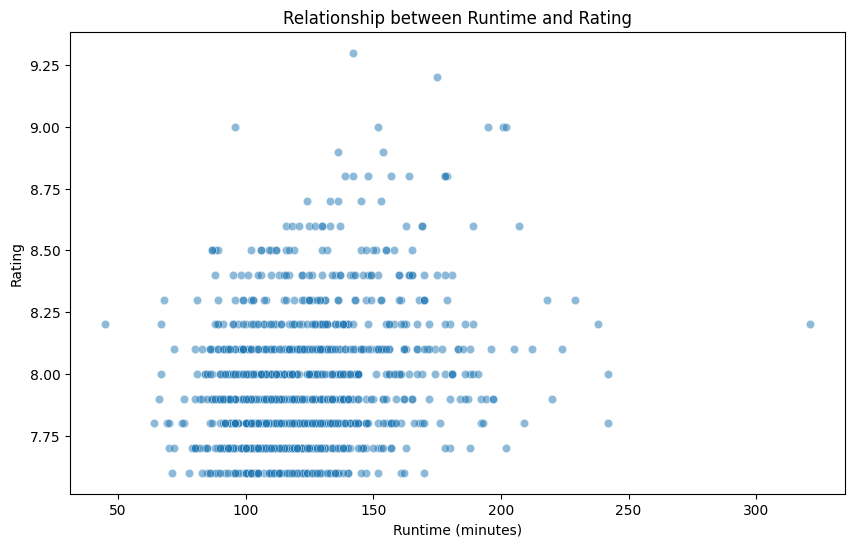

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime_in_min', y='Rating_from_10', data=df_encoded, alpha=0.5)
plt.title('Relationship between Runtime and Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.show()


In [83]:
# Calculate the average revenue for each genre
genre_avg_revenue = df_encoded.iloc[:, 7:27].mean()

# Sort genres by average revenue
genre_avg_revenue_sorted = genre_avg_revenue.sort_values(ascending=False)

# Get the top-rated genre based on revenue range
top_rated_genre = genre_avg_revenue_sorted.index[0]

print("Top-rated genre based on revenue range:", top_rated_genre)



Top-rated genre based on revenue range: Drama


In [84]:
df_enc = df_encoded.drop(['Revenue_Range', 'Decade'], axis=1)

In [85]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie_name      1000 non-null   object 
 1   Year            1000 non-null   int64  
 2   Certificate     1000 non-null   object 
 3   Runtime_in_min  1000 non-null   int64  
 4   Metascore       1000 non-null   float64
 5   Gross_in_$_M    1000 non-null   float64
 6   Rating_from_10  1000 non-null   float64
 7   Action          1000 non-null   int64  
 8   Adventure       1000 non-null   int64  
 9   Animation       1000 non-null   int64  
 10  Biography       1000 non-null   int64  
 11  Comedy          1000 non-null   int64  
 12  Crime           1000 non-null   int64  
 13  Drama           1000 non-null   int64  
 14  Family          1000 non-null   int64  
 15  Fantasy         1000 non-null   int64  
 16  Film-Noir       1000 non-null   int64  
 17  History         1000 non-null   in